<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Automatic_Differentiation_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import Lambda, ToTensor
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#Load the training data 
train_dataset = datasets.FashionMNIST(
    root ="data",
    train= True,
    download = True,
    transform = ToTensor(),
    target_transform=  Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y),value=1))
    )

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
#Load the testing data and set train attribute to false 
test_data =  datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
    target_transform= Lambda(lambda y:torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
    )

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

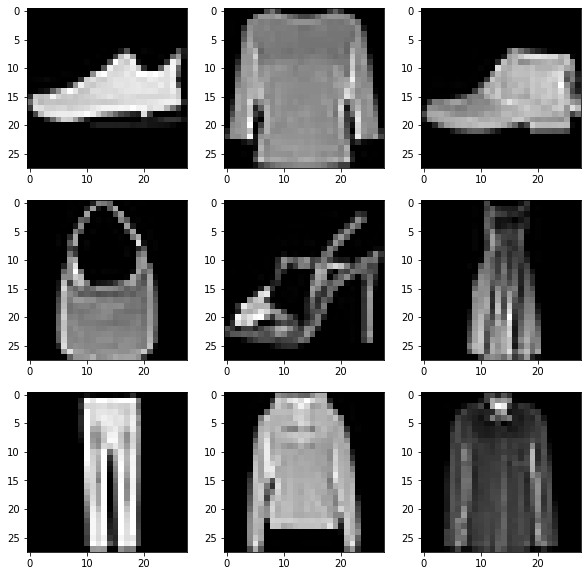

In [6]:
#We visualise the data first before passing it to our computational graph 
figure = plt.figure(figsize = (10,10))
cols,rows = 3,3
for i in range(1,rows * cols + 1):
    simple_idx =  torch.randint(len(train_dataset), size=(1,)).item()
    images, labels = train_dataset[simple_idx]
    figure.add_subplot(rows,cols, i)
    plt.imshow(images.squeeze(), cmap ='gray')
#    plt.title(labels_map[labels[i]])

In [7]:
#We now build our computational graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [8]:
#Create an instance of the model and pass it to the GPU 
model = NeuralNetwork().to(device)

In [9]:
#After passing our model to the GPU We can now pass data through the computation graph and check how well the model computes 
x = torch.randn(1,28,28, device = device) #Input data to our model 
#Make the prediction 
logits = model(x) #Model makes a prediction 
pred_prob = nn.Softmax(dim = 1)(logits) #Get the probality distribution of our model
y_pred = pred_prob.argmax(1) #Get the index of the maximum argument from our probability distribution that class is our predicted class

Automatic Differentiation with Pytorch:
Let's build a single layer neural network and compute the loss


In [10]:
#Inputs : Learned features
x = torch.ones(5)
#Targets: Expected outputs which will be compared to the ground truth
y = torch.zeros(3)
#Weights: Connection between units of different layers from both previous/preceeding
w = torch.randn(5,3, requires_grad=True)
#The bias term : is used to delay the activation of a node: Shift the activation curve to the left or right 
b = torch.randn(3,requires_grad=True)
#Linear function: Calculate the dot product I.e: The multiplication of the weights by the inputs x  and add a bias term to shift the activation 
z = torch.matmul(x,w) + b
#Calculate the loss 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [18]:
import torch
from torch import nn 
from torch.utils.data import Dataset, DataLoader 
from torchvision.transforms import ToTensor, Lambda
from torchvision import datasets 

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
train_dataset = datasets.FashionMNIST(
    root= "data",
    download = True,
    train = True, 
    transform = ToTensor(),
    target_transform= Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

In [25]:
test_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10 , dtype=torch.float).scatter_(0,torch.tensor(y), value = 1))        
)

In [ ]:
#Visualize the data before Building our computational graph
figure = plt.figure(figsize = (10,10))
cols , rows = 3,3
for i  in range(1,rows * cols + 1):
  simple_idx = torch.randint(len(train_dataset),size=(1,)).item()
  images, labels = train_dataset[simple_idx]
  figure.add_subplot(rows,cols,i)
  plt.imshow(images.squeeze(),cmap='gray')
  plt.axis('off')

In [56]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(        
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
        )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [57]:
model = NeuralNetwork().to(device)

In [62]:
x = torch.randn(1,28,28, device=device) #Input to pass to our model for prediction 
logits = model(x) #Outputs from our model in a vector  
pred_prob = torch.nn.Softmax(1)(logits) #Probability distribution  from our model
y_pred = pred_prob.argmax(1) #Get the index/class with the maximum value  

In [74]:
#Automatic differentiation with pytorch
x = torch.ones(5) #Inputs to our model
y = torch.zeros(3) #Expected output of our model
#weights
w = torch.randn(5,3,requires_grad= True)
#Bias term used to shift the activation function 
b = torch.randn(3,requires_grad=True)
z = torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [76]:
print(f"z:{z.grad_fn}")
print(f"loss:{loss.grad_fn}")

z:<AddBackward0 object at 0x7f22716fae10>
loss:<BinaryCrossEntropyWithLogitsBackward0 object at 0x7f22716fa0d0>


To optimize the parameters in our neural network we need to calculate the derivative of the loss with respect to the parameters w and b where w are the weights while b are the biases. To compute those derivatives we call the loss.backward() method and  retrive the them with the grad function.

In [80]:
loss.backward()
print(loss.grad)
print(b.grad)

None
tensor([0.3310, 0.1235, 0.0297])


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


In [86]:
#We can only obtain the gradient properties of the leaf nodes who have their requires_grad set to true
#We can only call .backward once in our computational graph. I.e we can only perform back propagation once in our computational graph
#In pytorch we can only calculate the gradients once because of performance reasons 
#We can disable gradient tracking on our computational graph by setting the requires_grad = True
z = torch.matmul(x,w) + b 
print(z.requires_grad) #Gradients tracking is on 

True


In [88]:
#We can disable gradient tracking
with torch.no_grad():
  z = torch.matmul(x,w) + b
  print(z.requires_grad) #Gradient tracking has been disabled

False


In [106]:
x = torch.ones(5) #Inputs to our model 
y = torch.zeros(3) #Expected output of our model, ground truth 
#Weights 
w = torch.randn(5,3, requires_grad=True) #Weight parameter with enabled gradient tracking i.e we can now calculate the gradients of the weights are use them for optimisation
#bias term  
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x,w) + b #Get the model prediction 
loss  = torch.nn.functional.binary_cross_entropy_with_logits(z,y) #Calculate the distance between the predicted value and the target value 

In [ ]:
#Calculate the gradient so that we optimize the weights  
print(w.grad)
print(z.grad)

In [111]:
#We can disable gradient tracking especially instances where we have trained the model and we want to do a forward pass on our computational graph(Make the predictions)
#Below is a method of how we can be able to disable gradient tracking
with torch.no_grad():
  z = torch.matmul(x,w) + b
  print(z.grad)
#We can also set the requires_grad properties of those parameters to false

None


Disabling gradient tracking
